In [40]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib
import bisect

In [4]:
# load standard model data
sm_er , sm_spec = np.loadtxt('data/argon_spec.txt', delimiter=' ')

# Loading all the data into a pandas dataframe

LMuTaupaths = glob.glob('input/*')

df_MuTau = pd.DataFrame()

for p in LMuTaupaths:
    filepath = p + '/spectra_Ar.npy'
    ERs, g_x, m_A, spec=np.load(filepath, allow_pickle=True)
    for i in range(len(m_A)):
        temp_entry = {'ERs': ERs, 'g_x':g_x, 'm_A':m_A[i], 'spec':spec[i]}
        #print(temp_entry)
        df_MuTau = df_MuTau.append(temp_entry, ignore_index=True)


In [2]:
df_MuTau

,ERs,g_x,m_A,spec
0,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000102,1.000000,"[1399873.6474421392, 1398701.1686751423, 13975..."
1,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000102,0.932603,"[1399873.6840631922, 1398701.2052703113, 13975..."
2,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000102,0.869749,"[1399873.7261693405, 1398701.2473466992, 13975..."
3,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000102,0.811131,"[1399873.7745822854, 1398701.2957254252, 13975..."
4,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000102,0.756463,"[1399873.8302468695, 1398701.3513506653, 13975..."
...,...,...,...,...
19995,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000784,0.001322,"[15709897459.95264, 15693873272.079021, 156778..."
19996,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000784,0.001233,"[20513991948.64525, 20492516132.122036, 204709..."
19997,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000784,0.001150,"[26741073639.9925, 26712263155.15236, 26683399..."
19998,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000784,0.001072,"[34790245575.99046, 34751561185.14603, 3471280..."


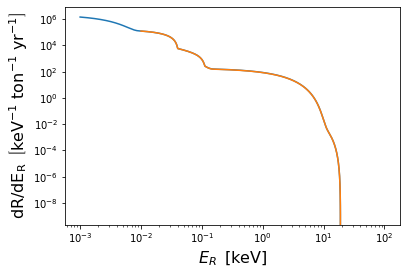

In [6]:
#%% plotting one spec
plt.xlabel(r'$E_R\,\,\,\left[\rm{keV}\right]$', size=16)
plt.ylabel(r'$\rm{d}R/\rm{d}E_R\,\,\,\left[\rm{keV}^{-1}\,\,\rm{ton}^{-1}\,\,\rm{yr}^{-1}\right]$', size=16)
plt.loglog(df_MuTau[(df_MuTau['g_x']==0.01) & (df_MuTau['m_A']==1.0)]['ERs'].values[0]*1e6, df_MuTau[(df_MuTau['g_x']==0.01) & (df_MuTau['m_A']==1.0)]['spec'].values[0])
plt.loglog(sm_er*1e6,sm_spec)

In [11]:
# Adding diff column to data frame
# using traps for the bsm specs then divding by the value for the sm - gives an indication of the difference between sma nd bsm
# find index above threshold for both and compare above 0.1 kev as this is what will make the difference in the PE plot
sm_index = bisect.bisect_left(sm_spec, 0.1e-6)
index = bisect.bisect_left(df_MuTau.iloc[1].ERs, 0.1e-6)
df_MuTau['diff'] = df_MuTau.apply(lambda x: np.trapz(x.spec[index:], x.ERs[index:])/ np.trapz(sm_spec[sm_index:], sm_er[sm_index:]), axis=1)

In [12]:
df_MuTau

,ERs,g_x,m_A,spec,diff
0,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000102,1.000000,"[1399873.6474421392, 1398701.1686751423, 13975...",0.103388
1,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000102,0.932603,"[1399873.6840631922, 1398701.2052703113, 13975...",0.103388
2,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000102,0.869749,"[1399873.7261693405, 1398701.2473466992, 13975...",0.103388
3,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000102,0.811131,"[1399873.7745822854, 1398701.2957254252, 13975...",0.103388
4,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000102,0.756463,"[1399873.8302468695, 1398701.3513506653, 13975...",0.103388
...,...,...,...,...,...
19995,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000784,0.001322,"[15709897459.95264, 15693873272.079021, 156778...",5.626013
19996,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000784,0.001233,"[20513991948.64525, 20492516132.122036, 204709...",5.801812
19997,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000784,0.001150,"[26741073639.9925, 26712263155.15236, 26683399...",5.963195
19998,"[1e-09, 1.00230569974896e-09, 1.00461671574925...",0.000784,0.001072,"[34790245575.99046, 34751561185.14603, 3471280...",6.110466


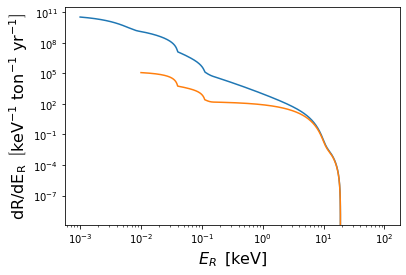

In [54]:
plt.xlabel(r'$E_R\,\,\,\left[\rm{keV}\right]$', size=16)
plt.ylabel(r'$\rm{d}R/\rm{d}E_R\,\,\,\left[\rm{keV}^{-1}\,\,\rm{ton}^{-1}\,\,\rm{yr}^{-1}\right]$', size=16)
plt.loglog(df_MuTau.iloc[1998].ERs*1e6, df_MuTau.iloc[19998].spec)
plt.loglog(sm_er*1e6, sm_spec) # sm only from 1e-2 whereas other spec are from 1e-3 - won't make a difference for PE spec!

/var/folders/f_/1l6ncsv14vx1gl48l5kcw0sc0000gp/T/ipykernel_54882/308284841.py:3: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.scatter(df_MuTau['m_A'].values, df_MuTau['g_x'].values, c=df_MuTau['diff'].values, norm=matplotlib.colors.LogNorm(), vmax = 2)


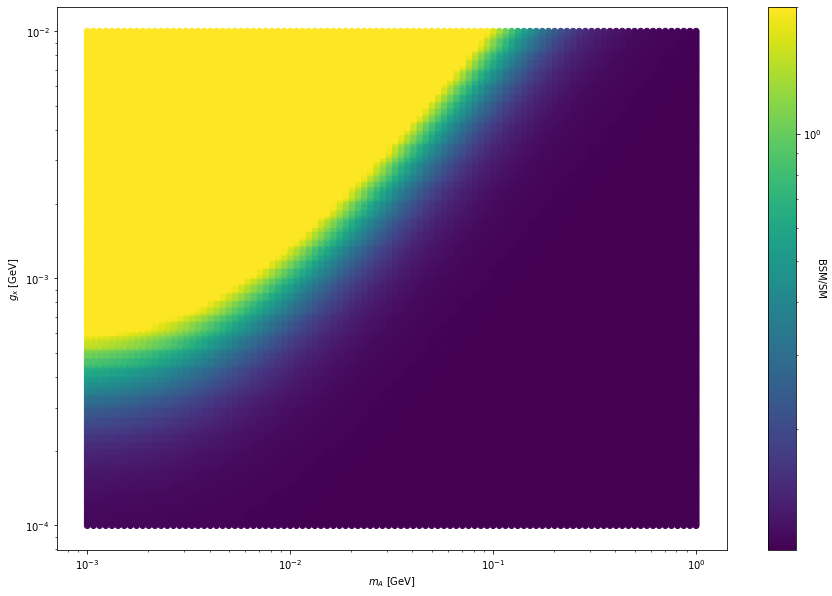

In [50]:
# plotting the diff with gx and M
f=plt.figure(figsize=(15,10))
plt.scatter(df_MuTau['m_A'].values, df_MuTau['g_x'].values, c=df_MuTau['diff'].values, norm=matplotlib.colors.LogNorm(), vmax = 2)
plt.ylabel('$g_x$ [GeV]')
plt.xlabel('$m_A$ [GeV]')
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar()
cbar.set_label('BSM/SM', rotation=270)
plt.show()

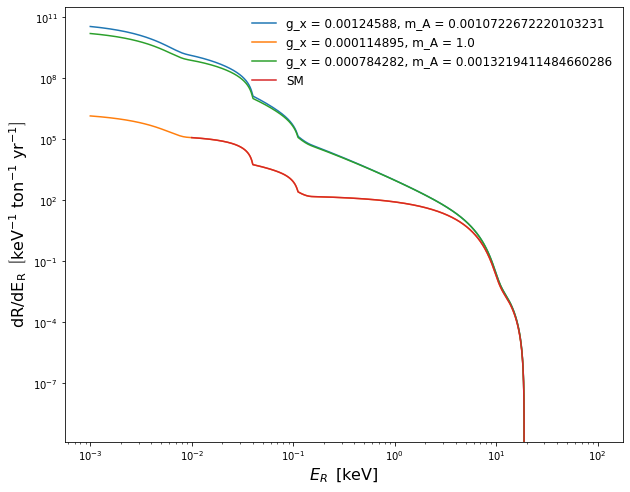

In [29]:
# Picking some points to plot - plot here and do for PE
f=plt.figure(figsize=(10,8))
plt.xlabel(r'$E_R\,\,\,\left[\rm{keV}\right]$', size=16)
plt.ylabel(r'$\rm{d}R/\rm{d}E_R\,\,\,\left[\rm{keV}^{-1}\,\,\rm{ton}^{-1}\,\,\rm{yr}^{-1}\right]$', size=16)

plt.loglog(df_MuTau.iloc[1998].ERs*1e6, df_MuTau.iloc[19998].spec, label = 'g_x = ' + str(df_MuTau.iloc[1998].g_x) + ', m_A = ' + str(df_MuTau.iloc[1998].m_A))

plt.loglog(df_MuTau.iloc[100].ERs*1e6, df_MuTau.iloc[100].spec, label = 'g_x = ' + str(df_MuTau.iloc[100].g_x) + ', m_A = ' + str(df_MuTau.iloc[100].m_A))

plt.loglog(df_MuTau.iloc[19995].ERs*1e6, df_MuTau.iloc[19995].spec, label = 'g_x = ' + str(df_MuTau.iloc[19995].g_x) + ', m_A = ' + str(df_MuTau.iloc[19995].m_A))

plt.loglog(sm_er*1e6, sm_spec, label = 'SM') # sm only from 1e-2 whereas other spec are from 1e-3 - won't make a difference for PE spec!
plt.legend(fontsize=12,frameon=False,loc='upper right')

In [30]:
from func_my_cevns import spectope

In [ ]:
a = 1998
b = 100
c = 19995

acev, abins = spectope(df_MuTau.iloc[a].ERs, df_MuTau.iloc[a].spec)

In [ ]:
# plotting
f=plt.figure(figsize=(10,8))

plt.plot(abins, acev, '-+',markersize=15, label='Using my_cevns')


plt.xlabel('Number of electrons',fontsize=26)
plt.ylabel('Events per tyr',fontsize=26) 
plt.yscale('log')
plt.legend(fontsize=18,frameon=False,loc='upper right')

In [68]:
# selecting values
g = 2e-3
m = 1e-2

df_MuTau[(df_MuTau['g_x'] < 1.05*g) & (df_MuTau['g_x'] > 0.95*g) & (df_MuTau['m_A']< 1.05*m) & (df_MuTau['m_A'] > 0.95*m)].index[0]

2066